In [110]:
import wbgapi as wb   # I use wb as a namespace in all my work
import pandas as pd   # optional but highly recommended for wbgapi
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

In [22]:
import wbgapi as wb
import pandas as pd

# Step 1: Fetch population data (SP.POP.TOTL is the total population indicator)
population_df = wb.data.DataFrame('SP.POP.TOTL', time=range(1960, 2023), labels=True)
population_df.reset_index(inplace=True)
population_df.rename(columns={'Country': 'COU'}, inplace=True)
population_df.rename(columns={'economy': 'Country', 'date': 'Year', 'SP.POP.TOTL': 'Population'}, inplace=True)
# Step 2: Fetch GDP data (Indicator: NY.GDP.MKTP.CD for GDP in current US$)
gdp_df = wb.data.DataFrame('NY.GDP.MKTP.CD', time=range(1960, 2023), labels=True)
gdp_df.reset_index(inplace=True)
gdp_df.rename(columns={'Country': 'COU'}, inplace=True)
gdp_df.rename(columns={'economy': 'Country', 'date': 'Year', 'NY.GDP.MKTP.CD': 'GDP'}, inplace=True)

# Step 3: Fetch tourism receipts data (Indicator: ST.INT.RCPT.CD for international tourism receipts)
tourism_df = wb.data.DataFrame('ST.INT.RCPT.CD', time=range(1960, 2023), labels=True)
tourism_df.reset_index(inplace=True)
tourism_df.rename(columns={'Country': 'COU'}, inplace=True)
tourism_df.rename(columns={'economy': 'Country', 'date': 'Year', 'ST.INT.XPND.CD': 'Tourism expenditure'}, inplace=True)

# step 4 : Fetch ST.INT.ARVL data
tourism_arrival_df = wb.data.DataFrame('ST.INT.ARVL', time=range(1960, 2023), labels=True)
tourism_arrival_df.reset_index(inplace=True)
tourism_arrival_df.rename(columns={'Country': 'COU'}, inplace=True)
tourism_arrival_df.rename(columns={'economy': 'Country', 'date': 'Year', 'ST.INT.ARVL': 'Tourist arrivals'}, inplace=True)



c:\_NO_INSTALL\python\WPy64-31150\python-3.11.5.amd64\Lib\site-packages\wbgapi\data.py:349: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Zimbabwe' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2.loc[index_key, concepts[i]['value']] = row[i]['value']
c:\_NO_INSTALL\python\WPy64-31150\python-3.11.5.amd64\Lib\site-packages\wbgapi\data.py:349: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Zimbabwe' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2.loc[index_key, concepts[i]['value']] = row[i]['value']
c:\_NO_INSTALL\python\WPy64-31150\python-3.11.5.amd64\Lib\site-packages\wbgapi\data.py:349: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Zimbabwe' has dtype incompatible with float64, ple

In [74]:

# Function to convert wide format (YR1960, YR1961, ...) to long format (Country, Year, Value)
def convert_to_long_format(df, value_name):
    # Use melt to convert wide columns (YR1960, YR1961, etc.) to long format
    long_df = pd.melt(df, id_vars=['COU', 'Country'], var_name='Year', value_name=value_name)
    long_df['Year'] = long_df['Year'].str.replace('YR', '')  # Remove 'YR' prefix
    long_df['Year'] = pd.to_numeric(long_df['Year'])  # Convert 'Year' to numeric
    return long_df

# Step 4: Convert any wide data to long format
# Assuming you have datasets similar to the one described, you'll convert them to long format
# Example wide format: 'Country', 'YR1960', 'YR1961', ... -> Long format with 'Country', 'Year', 'Value'
population_dfL = convert_to_long_format(population_df, 'Population')
gdp_dfL = convert_to_long_format(gdp_df, 'GDP')
tourism_dfL = convert_to_long_format(tourism_df, 'Tourism expenditure')
touarri_dfL = convert_to_long_format(tourism_arrival_df, 'Tourist arrivals')



In [75]:

# Step 5: Merge the dataframes on 'Country' and 'Year'
merged_df = pd.merge(population_dfL, gdp_dfL, on=['COU', 'Country', 'Year'], how='inner')
merged_df = pd.merge(merged_df, tourism_dfL, on=['COU', 'Country', 'Year'], how='inner')
merged_df = pd.merge(merged_df, touarri_dfL, on=['COU', 'Country', 'Year'], how='inner')

# length of the merged dataframe should be equal to the length of the population_df, gdp_df, and tourism_df
if not len(merged_df) == len(population_dfL) == len(gdp_dfL) == len(tourism_dfL):
    raise ValueError('Length of the merged dataframe is not equal to the length of the population_df, gdp_df, and tourism_df')
# Display the merged DataFrame only if at least on  values are not null in a row


# Optional: Save the merged dataframe to a CSV file
# merged_df.to_csv('population_gdp_tourism.csv', index=False)
# rename COU to Country and Country to COU in the merged_df
merged_df.rename(columns={'COU': 'Country', 'Country': 'COU'}, inplace=True)
print(len(merged_df))
merged_df.dropna(how='any').head(10)


16758


,Country,COU,Year,Population,GDP,Tourism expenditure,Tourist arrivals
9310,Zimbabwe,ZWE,1995,10994041.0,7.111271e+09,1.450000e+08,1416000.0
9316,"Venezuela, RB",VEN,1995,22107286.0,7.738949e+10,9.950000e+08,879000.0
9319,Uruguay,URY,1995,3208300.0,1.929766e+10,7.250000e+08,2177000.0
9320,United States,USA,1995,266278000.0,7.639749e+12,9.374300e+10,79732000.0
9321,United Kingdom,GBR,1995,58019030.0,1.344240e+12,2.757700e+10,23537000.0
9329,Tunisia,TUN,1995,9294102.0,1.803088e+10,1.838000e+09,4120000.0
9330,Trinidad and Tobago,TTO,1995,1307822.0,5.329214e+09,2.320000e+08,282000.0
9334,Thailand,THA,1995,59424834.0,1.692789e+11,9.257000e+09,6952000.0
9338,Switzerland,CHE,1995,7040687.0,3.528358e+11,1.135400e+10,6946000.0
9339,Sweden,SWE,1995,8826939.0,2.673059e+11,4.390000e+09,2310000.0


In [113]:
# remove non-c9ountry rows
noncountries=['WLD', 'UMC', 'TSS', 'SSA', 'SSF', 'TSA', 'SAS', 'SST', 'PRE', 'PST', 'PSS', 'OSS', 'OED',
 'INX', 'NAC', 'MIC', 'TMN', 'MNA', 'MEA', 'LMC', 'LIC', 'LMY', 'LDC', 'TLA', 'LAC', 'LCN',
 'LTE', 'IDA', 'IDX', 'IDB', 'IBT', 'IBD', 'HIC', 'HPC', 'FCS', 'EUU', 'TEC', 'ECA', 'ECS',
 'EMU', 'TEA', 'EAP', 'EAS', 'EAR', 'CEB', 'CSS', 'ARB', 'AFW', 'AFE']

merged_df = merged_df[~merged_df['COU'].isin(noncountries)]

In [114]:
# open excel file CLASS.xlsx
df = pd.read_excel('CLASS.xlsx')

# rename code to COU and economy to Country in the df
df.rename(columns={'Code': 'COU', 'Economy': 'Country', 'Income group': 'Group'}, inplace=True)
df.columns
# add a new column to the merged_df called 'Income group' and fill it with the values from the df from column 'Income group'
merged_df['Group'] = merged_df['Country'].map(df.set_index('Country')['Group'])
print(merged_df.head(10))
print(len(merged_df))


                      Country  COU  Year  Population           GDP  \
0                    Zimbabwe  ZWE  1960   3806310.0  1.052990e+09   
179  Central African Republic  CAF  1960   1679728.0  1.121556e+08   
180            Cayman Islands  CYM  1960      8473.0           NaN   
181                    Canada  CAN  1960  17909356.0  4.056377e+10   
182                  Cameroon  CMR  1960   5117608.0  6.142061e+08   
150                      Fiji  FJI  1960    401841.0  1.123284e+08   
151             Faroe Islands  FRO  1960     34154.0           NaN   
152                  Ethiopia  ETH  1960  21739710.0  1.610512e+09   
153                  Eswatini  SWZ  1960    345065.0  3.507685e+07   
154                   Estonia  EST  1960   1211537.0           NaN   

     Tourism expenditure  Tourist arrivals                Group  
0                    NaN               NaN  Lower middle income  
179                  NaN               NaN           Low income  
180                  NaN       

In [115]:
SIDS=[
    ["VUT", "Vanuatu"],
    ["TUV", "Tuvalu"],
    ["TCA", "Turks and Caicos Islands"],
    ["TTO", "Trinidad and Tobago"],
    ["TON", "Tonga"],
    ["VCT", "Saint Vincent and the Grenadines"],
    ["MAF", "Saint Martin"],
    ["LCA", "Saint Lucia"],
    ["KNA", "Saint Kitts and Nevis"],
    ["SLB", "Solomon Islands"],
    ["SXM", "Sint Maarten"],
    ["SGP", "Singapore"],
    ["SYC", "Seychelles"],
    ["STP", "São Tomé and Príncipe"],
    ["WSM", "Samoa"],
    ["PRI", "Puerto Rico"],
    ["PNG", "Papua New Guinea"],
    ["PLW", "Palau"],
    ["NCL", "New Caledonia"],
    ["NRU", "Nauru"],
    ["FSM", "Federated States of Micronesia"],
    ["MUS", "Mauritius"],
    ["MHL", "Marshall Islands"],
    ["MDV", "Maldives"],
    ["JAM", "Jamaica"],
    ["HTI", "Haiti"],
    ["GRD", "Grenada"],
    ["DMA", "Dominica"],
    ["CUB", "Cuba"],
    ["CPV", "Cape Verde"],
    ["COM", "Comoros"],
    ["BRB", "Barbados"],
    ["BHS", "Bahamas"],
    ["ATG", "Antigua and Barbuda"],
    ["ASM", "American Samoa"],
    ["ABW", "Aruba"]
]

# update the merged_df with the SIDS list change Group to SIDS for the countries in the SIDS list keep this as a new list
# first make a copy of the merged_df
merged_dfSIDS = merged_df.copy()


for i in range(len(SIDS)):
    merged_dfSIDS.loc[merged_dfSIDS['COU'] == SIDS[i][0], 'Group'] = 'SIDS'
    
 


    

In [116]:
# Population	GDP	Tourism expenditure	Tourist arrivals	Group
# calculate two new columns in the merged_dfSIDS
# first column is the Tourism expenditure/GDP second column is the Tourist arrivals/Population
merged_dfSIDS['Tourism expenditure/GDP'] = merged_dfSIDS['Tourism expenditure']/merged_dfSIDS['GDP']
merged_dfSIDS['Tourist arrivals/Population'] = merged_dfSIDS['Tourist arrivals']/merged_dfSIDS['Population']

# now average the values of all the columns in the merged_dfSIDS for each group, keeping values for each year
# first make a copy of the merged_dfSIDS
tmp_group1 = merged_dfSIDS.copy()
# drop the columns Country and COU
tmp_group1.drop(columns=['Country', 'COU'], inplace=True)
# group by Year and Group
tmp_group1 = tmp_group1.groupby(['Year', 'Group']).mean().reset_index()
# now plot the values of the columns in the merged_dfSIDS_group for each group



In [117]:
plt.figure()
# plot the Tourist arrivals/Population for each group
plt.figure(figsize=(12, 6))
#  replace all Group values that are not SIDS with 'Other'
tmp=merged_dfSIDS.copy()
# get unique values of Group and remove SIDS
vals=tmp['Group'].unique().tolist()
vals.remove('SIDS')
tmp['Group'] = tmp['Group'].replace(vals, 'Other')
# now average the values of all the columns in the merged_dfSIDS for each group, keeping values for each year
# first make a copy of the merged_dfSIDS
tmp_group2 = tmp.copy()
# drop the columns Country and COU
tmp_group2.drop(columns=['Country', 'COU'], inplace=True)
# group by Year and Group
tmp_group2 = tmp_group2.groupby(['Year', 'Group']).mean().reset_index()
# recalculate the Tourist arrivals/Population
tmp_group2['Tourist arrivals/Population'] = tmp_group2['Tourist arrivals']/tmp_group2['Population']
# use red for SIDS and blue for Other


<Figure size 640x480 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

c:\_NO_INSTALL\python\WPy64-31150\python-3.11.5.amd64\Lib\site-packages\seaborn\_oldcore.py:1124: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
c:\_NO_INSTALL\python\WPy64-31150\python-3.11.5.amd64\Lib\site-packages\seaborn\_oldcore.py:1124: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
c:\_NO_INSTALL\python\WPy64-31150\python-3.11.5.amd64\Lib\site-packages\seaborn\_oldcore.py:1124: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
c:\_NO_INSTALL\python\WPy64-31150\python-3.11.5.amd64\Lib\site-packages\seaborn\_oldcore.py:1124: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


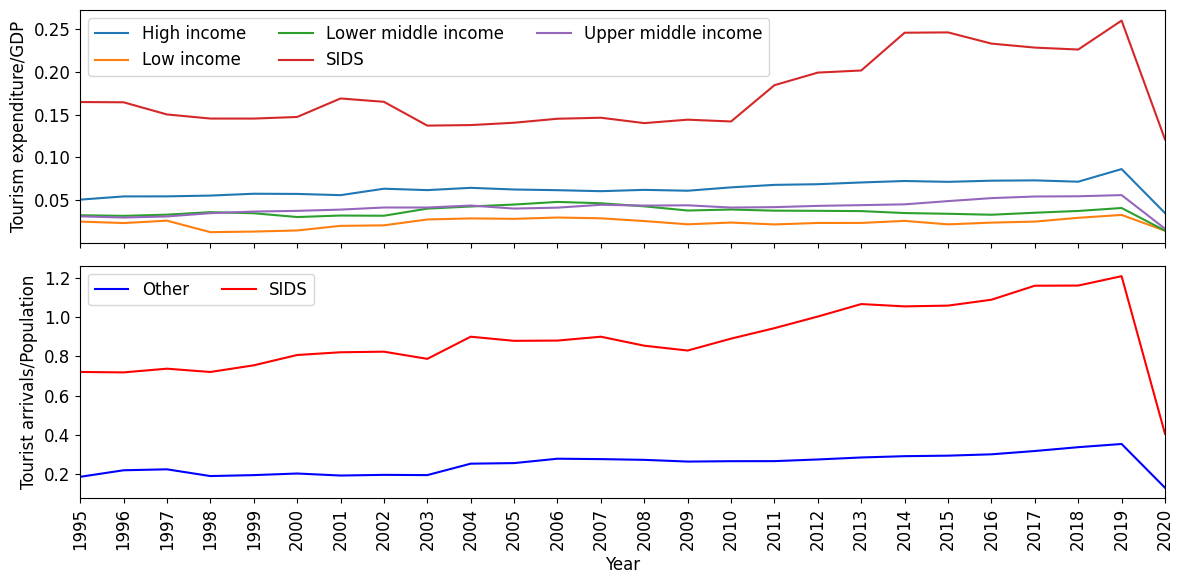

In [118]:
# Create subplots with shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# First plot - Tourism expenditure/GDP
sns.lineplot(data=tmp_group1, x='Year', y='Tourism expenditure/GDP', hue='Group', ax=ax1)

#ax1.set_title('Tourism expenditure/GDP')
# Rotate x axis labels
ax1.tick_params(axis='x', rotation=90)
# Set x tick frequency to 1
ax1.xaxis.set_major_locator(plt.MultipleLocator(1))
# Set legend to 3 columns
ax1.legend(ncol=3)


# Second plot - Tourist arrivals/Population
sns.lineplot(data=tmp_group2, x='Year', y='Tourist arrivals/Population', hue='Group', palette=['blue', 'red'], ax=ax2)
#ax2.set_title('Tourist arrivals/Population')
# Rotate x axis labels
ax2.tick_params(axis='x', rotation=90)
# Set x tick frequency to 1
ax2.xaxis.set_major_locator(plt.MultipleLocator(1))
ax2.legend(ncol=2)
# x range 1995 to 2020
plt.xlim(1995, 2020)
# Adjust layout to prevent overlap
plt.tight_layout()
# Show plot
#save the plot to a file svg
plt.savefig('tourism.svg')
# set the font size to 12
plt.rcParams.update({'font.size': 12})
plt.show()

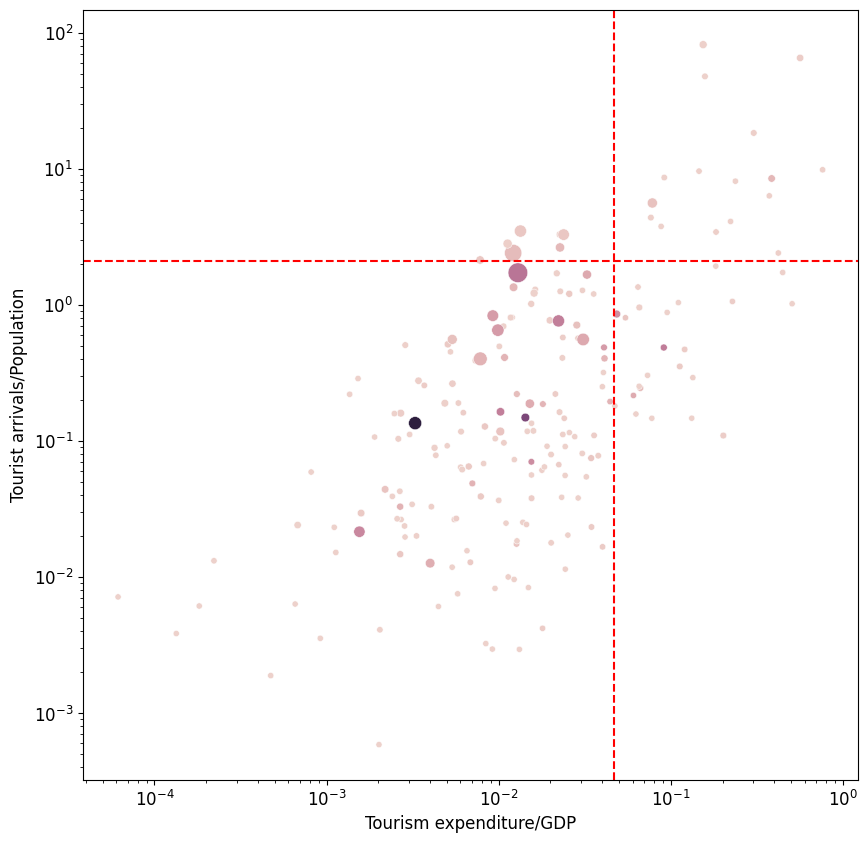

In [119]:
# Sort the DataFrame by Year in ascending order to ensure the last non-null value corresponds to the most recent year
merged_df = merged_df.sort_values(by='Year')

# Group by 'Country' and use last to get the most recent non-null values for Population, GDP, Tourism expenditure, and Tourist arrivals
latest_values_df = merged_df.groupby('Country').agg({
    'Population': 'last',
    'GDP': 'last',
    'Tourism expenditure': 'last',
    'Tourist arrivals': 'last'
}).reset_index()

latest_values_df

# calculate ratios of Tourism expenditure/GDP and Tourist arrivals/Population
latest_values_df['Tourism expenditure/GDP'] = latest_values_df['Tourism expenditure'] / latest_values_df['GDP']
latest_values_df['Tourist arrivals/Population'] = latest_values_df['Tourist arrivals'] / latest_values_df['Population']

#plot scatter plot of Tourism expenditure/GDP vs Tourist arrivals/Population
plt.figure(figsize=(10, 10))
sns.scatterplot(data=latest_values_df, x='Tourism expenditure/GDP', y='Tourist arrivals/Population', hue='Tourism expenditure', size='Tourist arrivals', sizes=(20, 200), legend=False)

# calculate the mean + 1 std of Tourism expenditure/GDP and Tourist arrivals/Population
mean_tourism_gdp = latest_values_df['Tourism expenditure/GDP'].mean()
std_tourism_gdp = latest_values_df['Tourism expenditure/GDP'].std()
mean_tourist_arrivals = latest_values_df['Tourist arrivals/Population'].mean()
std_tourist_arrivals = latest_values_df['Tourist arrivals/Population'].std()
# add a horizontal line at the mean of Tourism expenditure/GDP
plt.axvline(mean_tourism_gdp, color='r', linestyle='--')
# add a vertical line at the mean of Tourist arrivals/Population
plt.axhline(mean_tourist_arrivals, color='r', linestyle='--')
#log log scale
plt.xscale('log')
plt.yscale('log')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


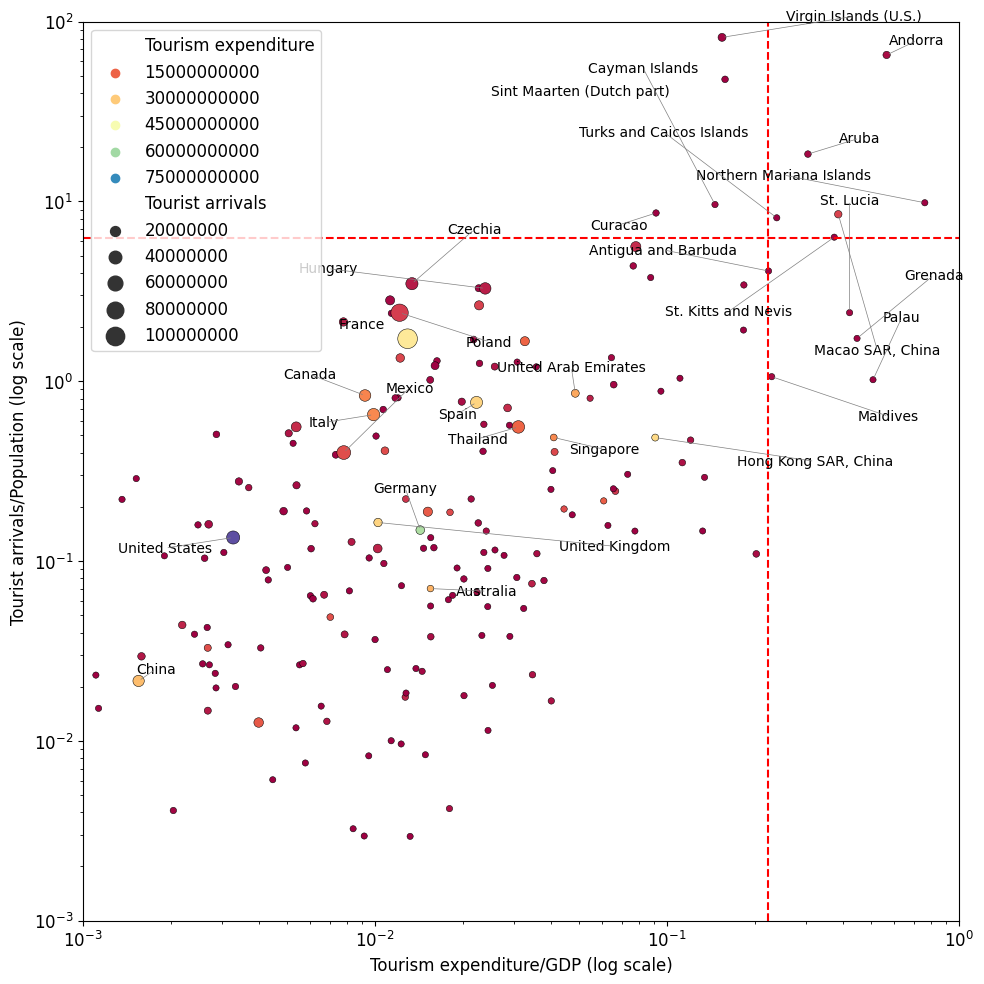

(['Andorra',
  'Antigua and Barbuda',
  'Aruba',
  'Grenada',
  'Macao SAR, China',
  'Maldives',
  'Northern Mariana Islands',
  'Palau',
  'St. Kitts and Nevis',
  'St. Lucia',
  'Turks and Caicos Islands'],
 ['Andorra',
  'Aruba',
  'Cayman Islands',
  'Curacao',
  'Macao SAR, China',
  'Northern Mariana Islands',
  'San Marino',
  'Sint Maarten (Dutch part)',
  'St. Kitts and Nevis',
  'Turks and Caicos Islands',
  'Virgin Islands (U.S.)'],
 ['Australia',
  'China',
  'France',
  'Germany',
  'Hong Kong SAR, China',
  'Italy',
  'Singapore',
  'Spain',
  'United Arab Emirates',
  'United Kingdom',
  'United States'],
 ['Canada',
  'China',
  'Czechia',
  'France',
  'Hungary',
  'Italy',
  'Mexico',
  'Poland',
  'Spain',
  'Thailand',
  'United States'])

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
import numpy as np

# Sort the DataFrame by Year in ascending order to ensure the last non-null value corresponds to the most recent year
merged_df = merged_df.sort_values(by='Year')

# Group by 'Country' and use last to get the most recent non-null values for Population, GDP, Tourism expenditure, and Tourist arrivals
latest_values_df = merged_df.groupby('Country').agg({
    'Population': 'last',
    'GDP': 'last',
    'Tourism expenditure': 'last',
    'Tourist arrivals': 'last'
}).reset_index()

# Calculate ratios of Tourism expenditure/GDP and Tourist arrivals/Population
latest_values_df['Tourism expenditure/GDP'] = latest_values_df['Tourism expenditure'] / latest_values_df['GDP']
latest_values_df['Tourist arrivals/Population'] = latest_values_df['Tourist arrivals'] / latest_values_df['Population']

# Calculate the 90th percentile of Tourism expenditure/GDP and Tourist arrivals/Population
p90_tourism_gdp = latest_values_df['Tourism expenditure/GDP'].quantile(.95)
p90_tourist_arrivals = latest_values_df['Tourist arrivals/Population'].quantile(.95)

# Calculate the 90th percentile of Tourism expenditure and Tourist arrivals
p90_tourism_expenditure = latest_values_df['Tourism expenditure'].quantile(.95)
p90_tourist_arrivals_total = latest_values_df['Tourist arrivals'].quantile(.95)

# Set font size
plt.rcParams.update({'font.size': 12})

# Plot scatter plot of Tourism expenditure/GDP vs Tourist arrivals/Population
fig, ax = plt.subplots(figsize=(10, 10))  # Create a figure and axes object
scatter = sns.scatterplot(
    data=latest_values_df, 
    x='Tourism expenditure/GDP', 
    y='Tourist arrivals/Population', 
    hue='Tourism expenditure', 
    size='Tourist arrivals', 
    sizes=(20, 200), 
    legend=True,  # We'll manually handle the legends
    edgecolor='black',  # Add a black edge to the markers
    palette='Spectral',
    ax=ax,  # Add ax reference here
    
)
# x, y limits

# move legend to top left
plt.legend(loc='upper left')
# Add a vertical line at the 90th percentile of Tourism expenditure/GDP
plt.axvline(p90_tourism_gdp, color='r', linestyle='--')

# Add a horizontal line at the 90th percentile of Tourist arrivals/Population
plt.axhline(p90_tourist_arrivals, color='r', linestyle='--')

# Log-log scale for better data distribution
plt.xscale('log')
plt.yscale('log')

# Set labels
plt.xlabel('Tourism expenditure/GDP (log scale)')
plt.ylabel('Tourist arrivals/Population (log scale)')

# Prepare the labels for adjustment using adjustText
texts = []

# Lists to store countries based on different conditions
TEG = []  # For Tourism expenditure/GDP > p90_tourism_gdp
TAR = []  # For Tourist arrivals/Population > p90_tourist_arrivals
TE = []   # For Tourism expenditure > p90_tourism_expenditure
TA = []   # For Tourist arrivals > p90_tourist_arrivals_total

# Label countries that match the conditions and append to the appropriate list
for i, row in latest_values_df.iterrows():
    lab=False
    if row['Tourism expenditure/GDP'] > p90_tourism_gdp:
        lab=True
        TEG.append(row['Country'])
    
    if row['Tourist arrivals/Population'] > p90_tourist_arrivals:
        lab=True
        TAR.append(row['Country'])
    
    if row['Tourism expenditure'] > p90_tourism_expenditure:
        lab=True
        TE.append(row['Country'])
    
    if row['Tourist arrivals'] > p90_tourist_arrivals_total:
        lab=True
        TA.append(row['Country'])
    
    # Add text to the plot for the countries that match any of the conditions
    if (lab):
        
        texts.append(
            plt.text(row['Tourism expenditure/GDP'], row['Tourist arrivals/Population'], row['Country'], 
                     fontsize=10, ha='right', color='black')
        )


# Adjust the text labels to avoid overlap, always forcing a connecting line (without arrowheads)
adjust_text(texts, 
            arrowprops=dict(arrowstyle='-', color='gray', lw=0.5),  # Always draw lines (no arrowheads)
            force_text=(1.5, 2),  # Force the text to move away from the points
            force_points=(1.5, 2),  # Force the points away from the text
            expand_points=(1.5, 1.5),  # Additional expansion
            expand_text=(1.5, 1.5),    # Additional expansion
            only_move={'points': 'y', 'text': 'xy'},  # Allow text to move in x and y directions
            autoalign='y',  # Align text automatically along the y-axis
            )


plt.xlim(1e-3, 1e0)
plt.ylim(1e-3, 1e2)
# Show the plot
plt.tight_layout()
# save the plot to a file svg 
plt.savefig('tourism2.svg')
plt.show()
TEG, TAR, TE, TA